
Speed sensor measure velocity
We estimate position and filter velocity

[The Kalman Filter](https://towardsdatascience.com/kalman-filter-an-algorithm-for-making-sense-from-the-insights-of-various-sensors-fused-together-ddf67597f35e)

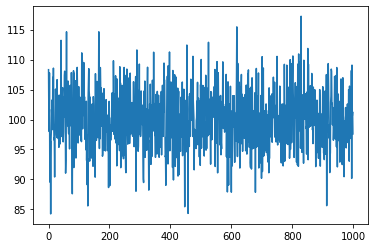

In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
SPEED = 100.0
noise = np.random.normal(0, 5, 1000)
signal = np.full((1, 1000), SPEED)+noise
signal = np.squeeze(signal)
plt.plot(signal)

In [18]:
def kalman(signal):
    out = np.zeros((len(signal),2))
    x = np.matrix([[0.0], [0.0]])
    dt = 1
    H = np.matrix([0,1])
    P=np.matrix([[1.0,0],[0, 1.0]])
    R=.0001
    A=np.matrix([[1, dt], [0, 1]])
    for i in range(len(signal)):
        x = np.matmul(A, x)
        P= A*P * np.transpose(A)
        K = (P*np.transpose(H)*np.linalg.inv(H*P*np.transpose(H)+R))
        z=signal[i]
        resudial=K*(z-H*x)
        x=x+resudial
        P=P-K*H*P
        out[i,0]=x[0]
        out[i,1]=x[1]
    return out

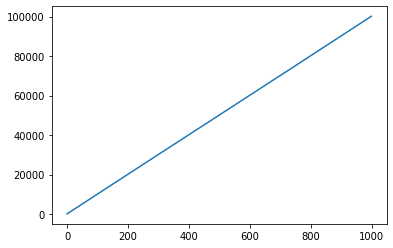

In [19]:
out=kalman(signal)
plt.plot(out[:,0])

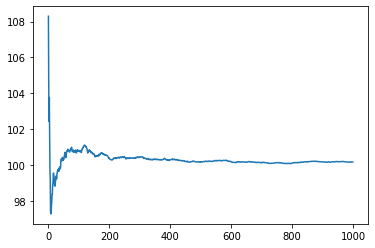

In [20]:
plt.plot(out[:,1])

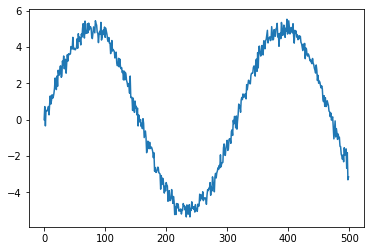

In [21]:
data = np.arange(0,50,0.1)
signal = 5*np.sin(data*0.2)
noise = np.random.normal(0,0.3,500)
signal=signal+noise
plt.plot(signal)

In [24]:
def kalman_sin(signal):
    out = np.zeros((len(signal),2))
    x = np.matrix([[0.0], [0.0]])
    dt = 1
    H = np.matrix([0,1])
    P=np.matrix([[1.0,0],[0, 1.0]])
    R=.0001
    w=0.2
    A=np.matrix([[0, 1], [-math.pow(w,2), 0]])
    for i in range(len(signal)):
        x = np.matmul(A, x)
        P= A*P * np.transpose(A)
        K = (P*np.transpose(H)*np.linalg.inv(H*P*np.transpose(H)+R))
        z=signal[i]
        resudial=K*(z-H*x)
        x=x+resudial
        P=P-K*H*P
        out[i,0]=x[0]
        out[i,1]=x[1]
    return out

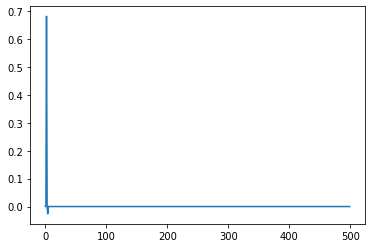

In [25]:
out=kalman_sin(signal)
plt.plot(out[:,0])